In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

/var/folders/99/bpjbh7v565j2_dj9h91d6tmr0000gn/T/ipykernel_60378/1523236056.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Linear Regression from Scratch

In [2]:
data = pd.read_csv("data_for_lr.csv")

## Data description

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

## data processing

In [6]:
#droping the null values
data.dropna(inplace = True)
data.shape

(699, 2)

## splitting data

In [7]:
# training input and output
train_input = np.array(data.x[:500]).reshape(500,1)
train_output = np.array(data.y[:500]).reshape(500,1)

# training input and output shape
train_input.shape, train_output.shape

((500, 1), (500, 1))

In [8]:
# validation data input and output
test_input = np.array(data.x[500:699]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

# validation input and output shape
test_input.shape, test_output.shape

((199, 1), (199, 1))

## Forward Propagation

    
\begin{equation}
f(x) = m*x+c
\end{equation}

In [9]:
def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m, train_input) + c
    
    return predictions

## Cost Function

\begin{equation}
cost fun = summation(1/2n * (y-f(x))^2)
\end{equation}

In [10]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) **2) * 0.5
    return cost

## Gradient Descent For Backpropagation

\begin{equation}
    df = (f(x) - y) / n
\end{equation}
\begin{equation}
    dm = df * x
\end{equation}
\begin{equation}
    dc = df* 1
\end{equation}
\begin{equation}
    d(cost)/dm = d(cost)/df * df/dm
\end{equation}

In [11]:
def backward_propagation(train_input , train_output, predictions):
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df , train_input))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives

## Update Parameters

\begin{equation}
m = m - (learning_rate * dm)
\end{equation}
\begin{equation}
c = c - (learning_rate * dc)
\end{equation}

In [12]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    
    return parameters

## Model Training

In [13]:
def train(train_input, train_output, learning_rate, iters):
    # random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    
    
    plt.figure()
    # loss
    loss = list()
    
    
    # iteration
    for i in range(iters):
        # forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        # cost 
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f'Iteration = {i+1}, Loss = {cost}')
        
        # plot
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, '+', label = 'original')
        ax.plot(train_input, predictions, '*', label = 'Training')
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+', label = 'original')
        plt.plot(train_input, predictions, '*', label = 'Training')
        plt.show()
        
        
        # backward propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        # update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters,loss

## Training

Iteration = 1, Loss = 4.071415708837585


<Figure size 640x480 with 0 Axes>

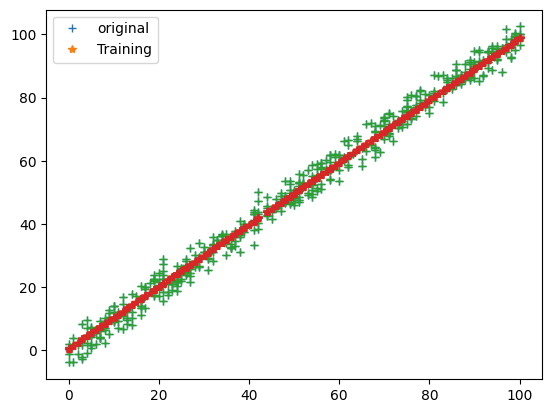

Iteration = 2, Loss = 4.019912471155928


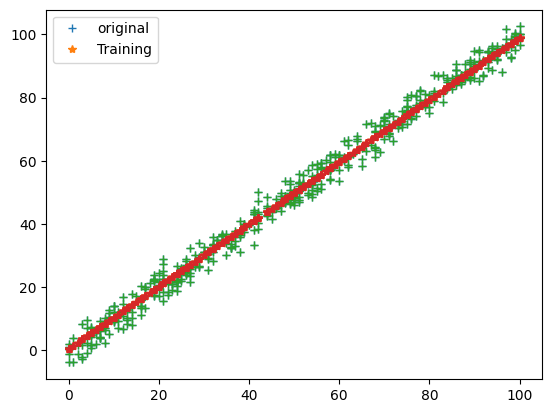

Iteration = 3, Loss = 3.996543557496129


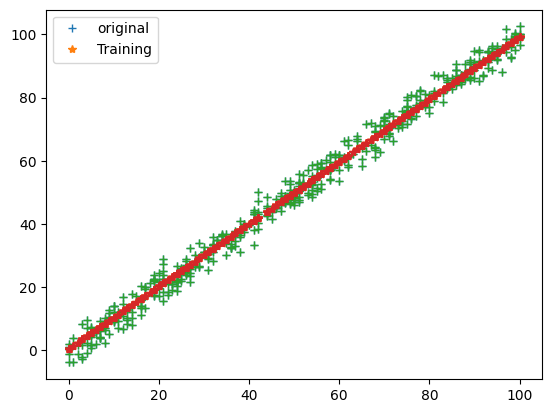

Iteration = 4, Loss = 3.985939217900353


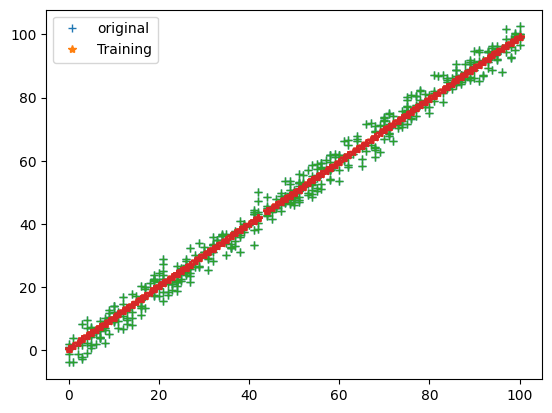

Iteration = 5, Loss = 3.9811261797885598


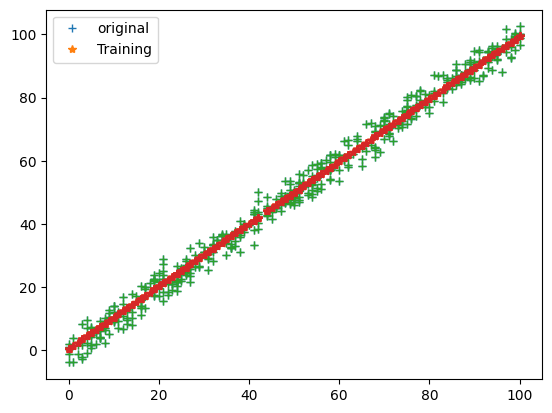

Iteration = 6, Loss = 3.9789406616672927


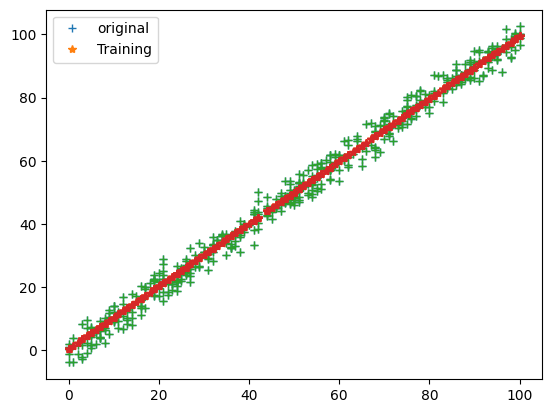

Iteration = 7, Loss = 3.9779472523686326


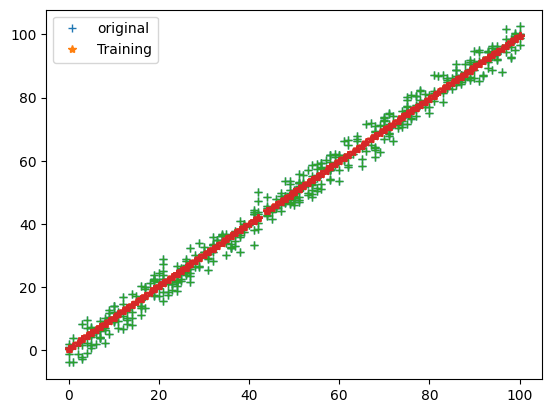

Iteration = 8, Loss = 3.977494704255769


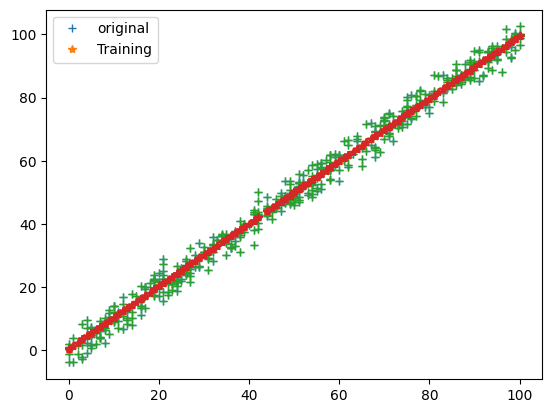

Iteration = 9, Loss = 3.9772875455545296


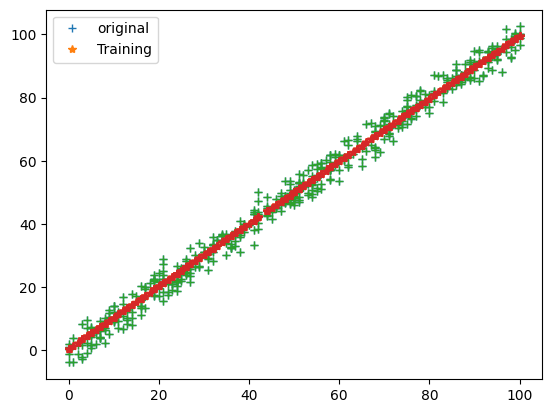

Iteration = 10, Loss = 3.9771917203936873


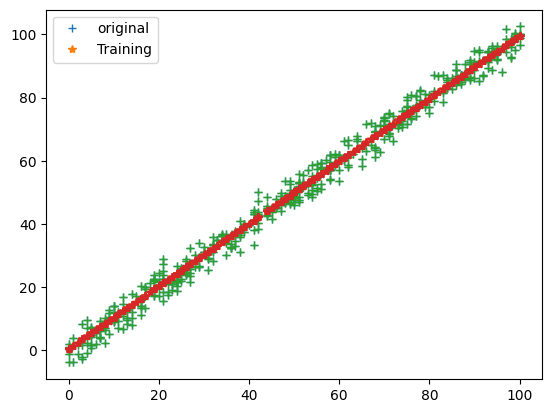

Iteration = 11, Loss = 3.977146407475981


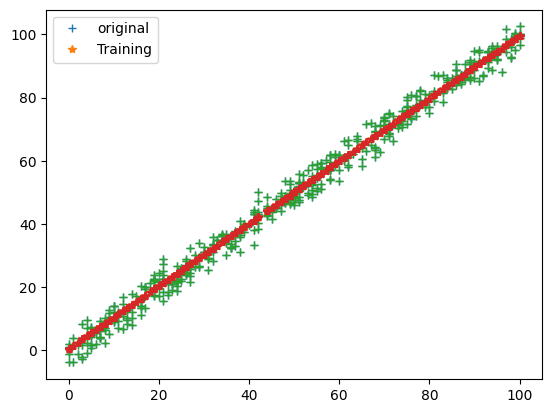

Iteration = 12, Loss = 3.9771240121114633


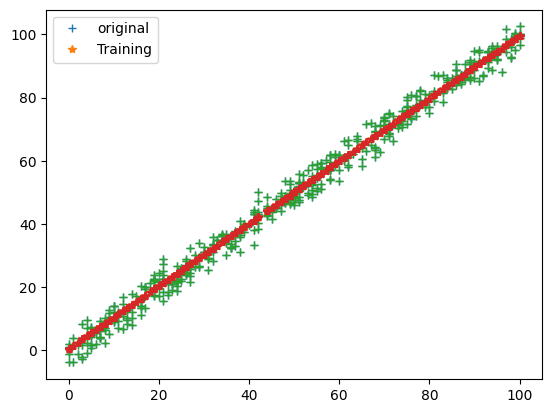

Iteration = 13, Loss = 3.977112014558742


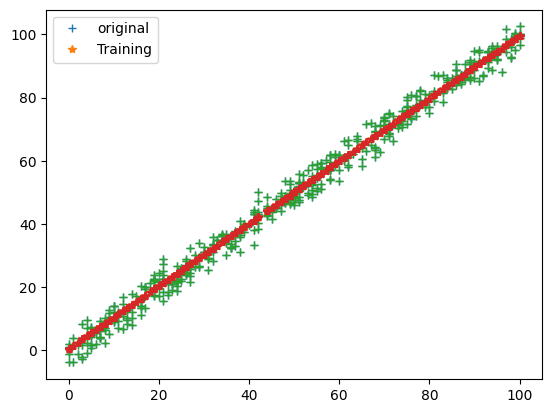

Iteration = 14, Loss = 3.977104734597273


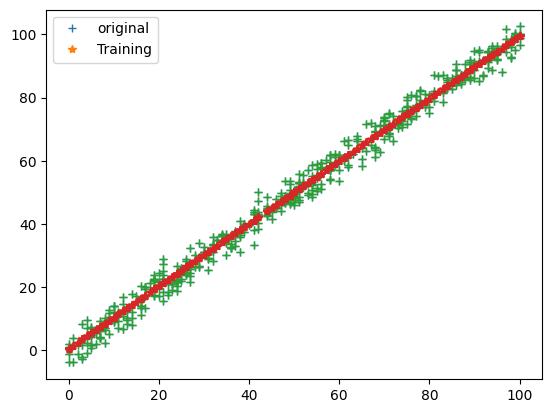

Iteration = 15, Loss = 3.9770995951047006


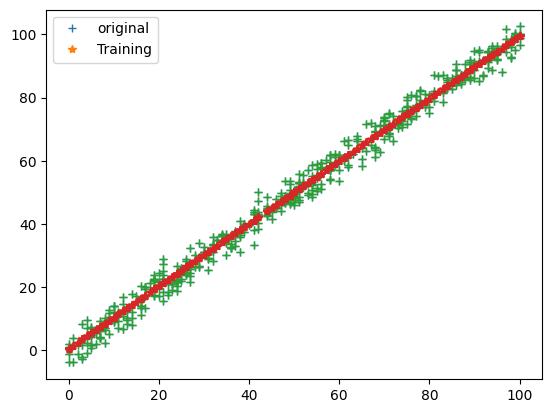

Iteration = 16, Loss = 3.977095426837749


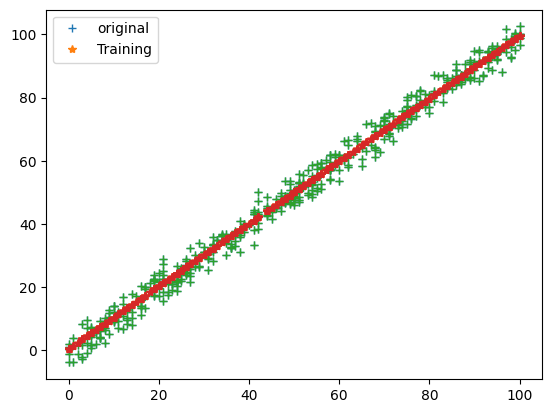

Iteration = 17, Loss = 3.9770916993094474


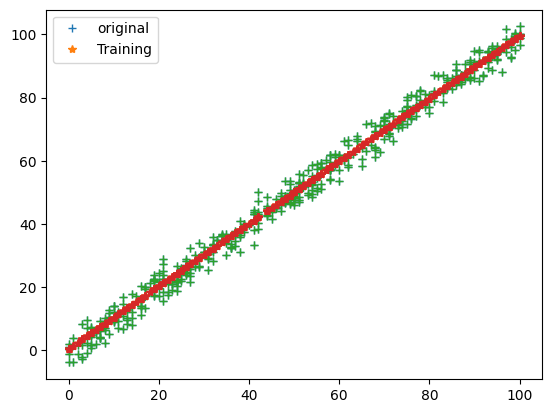

Iteration = 18, Loss = 3.9770881718372637


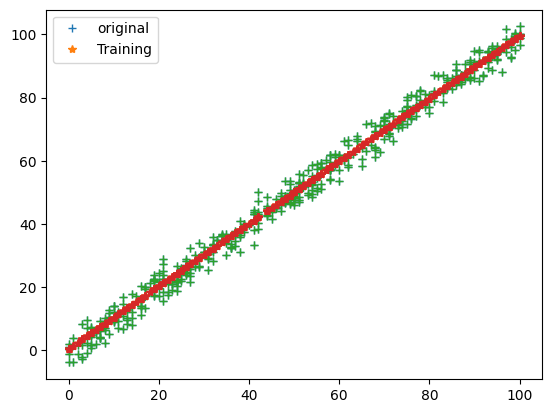

Iteration = 19, Loss = 3.977084735223263


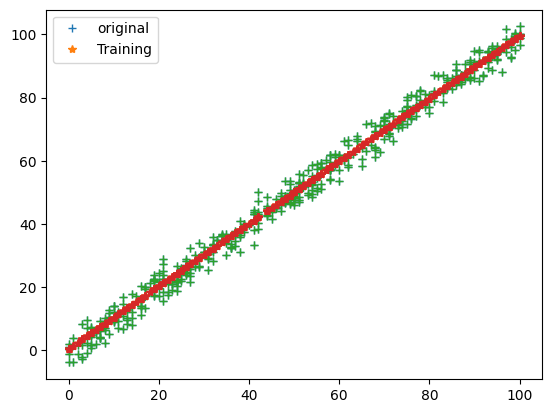

Iteration = 20, Loss = 3.977081339924215


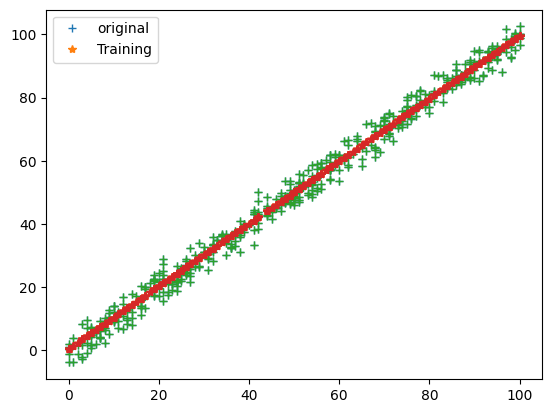

In [14]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [15]:
parameters

{'m': 0.9899770386316398, 'c': 0.4917410692824481}

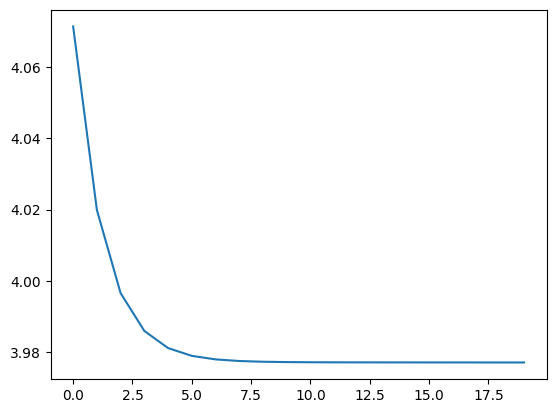

In [16]:
plt.plot(loss)

## Prediction for the model

In [17]:
test_predictions = test_input * parameters['m'] + parameters['c']

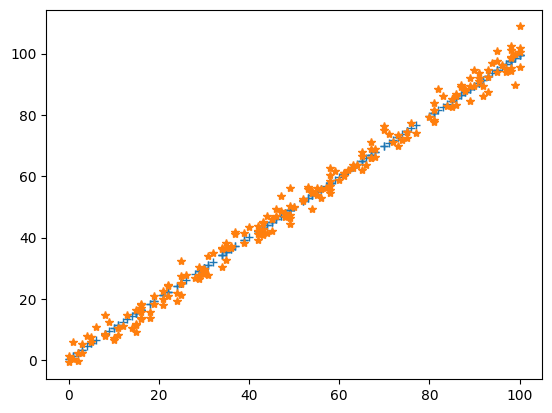

In [18]:
# checking the predictions
plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output, '*')
plt.show()

## Cost of prediction

In [19]:
# error in our predictions
cost_function(test_output, test_predictions)

4.000409511799971

# Linear Regression by Scikit Learn

In [20]:
from sklearn.linear_model import LinearRegression

## Training Model

In [21]:
lr_model = LinearRegression()

In [22]:
# training the model by using .fit() funciton
lr_model.fit(train_input, train_output)

LinearRegression()

In [23]:
# m value 
lr_model.coef_

array([[1.0009993]])

In [24]:
# c value 
lr_model.intercept_

array([-0.23603461])

## Prediction

In [25]:
train_predictions = lr_model.predict(test_input)

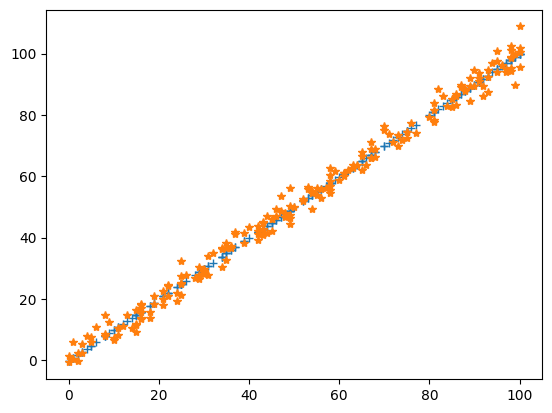

In [26]:
plt.plot(test_input, train_predictions,'+')
plt.plot(test_input, test_output, '*')
plt.show()

## cost


In [27]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(test_output, train_predictions)
cost

8.030031591835375